# Applying Linear Regression

# China analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt

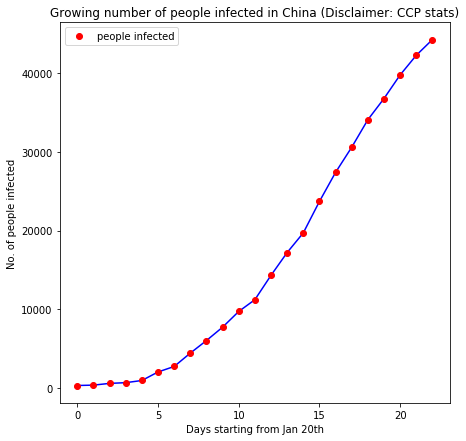

In [2]:
start = "Jan 20th" # start of keeping counts?
# current = "Feb 11th"
china = [278, 326, 547, 639, 916, 2000, 2700, 4400, 6000, 7700, 9700, 11200, 14300, 17200, 19700, 23700, 27400, 30600, 34100, 
         36800, 39800, 42300, 44300]

plt.figure(figsize=(7, 7))
plt.xlabel("Days starting from " + start)
plt.ylabel("No. of people infected")
plt.title("Growing number of people infected in China (Disclaimer: CCP stats)")

plt.plot(range(len(china)), china, 'b-')

for i in range(len(china)):
    a, = plt.plot(i, china[i], 'ro', label="people infected")

plt.legend(handles=[a])
plt.show()

# Non-china analysis

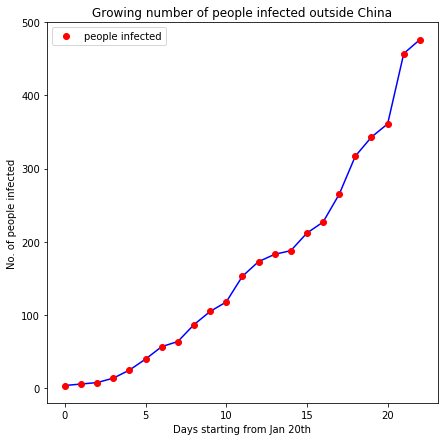

In [3]:
non_china = [4, 6, 8, 14, 25, 40, 57, 64, 87, 105, 118, 153, 173, 183, 188, 212, 227, 265, 317, 343, 361, 457, 476]

plt.figure(figsize=(7, 7))
plt.xlabel("Days starting from " + start)
plt.ylabel("No. of people infected")
plt.title("Growing number of people infected outside China")

plt.plot(range(len(non_china)), non_china, 'b-')

for i in range(len(non_china)):
    a, = plt.plot(i, non_china[i], 'ro', label="people infected")

plt.legend(handles=[a])
plt.show()

# Linear Regression

# A. Linear Regression - Formula

In [4]:
# code for a basic linear regression model

# formula: y = m*x + c
# need to find m and c

def get_slope(day, infect):
    # day: the independent variable 'x'
    # infect: the dependent variable to be predicted 'y'
    
    # total observations
    tot = np.size(day)
    
    # mean values
    mean_day = np.mean(day)
    mean_infect = np.mean(infect)
    
    # coefficient c = Sum squared of days and infect / Sum squared of days
    ss_di = np.sum(day*infect) + tot*mean_day*mean_infect
    ss_dd = np.sum(day*day) + tot*mean_day*mean_day
    
    m = ss_di / ss_dd
    
    return m

def get_coeff(day, infect, m):
    # day: the independent variable 'x'
    # infect: the dependent variable to be predicted 'y'
    # m: the slope calculated by get_slope
    
    # means of day and infect
    mean_day = np.mean(day)
    mean_infect = np.mean(infect)
    
    # slope m = mean_infect - coefficient * mean_day
    c = mean_infect - m*mean_day
    
    return c

def plot_lines_points(day, infect, title):
    # day: the independent variable 'x'
    # infect: the dependent variable to be predicted 'y'
    
    start = "Jan 20th"
    plt.figure(figsize=(7, 7))
    plt.xlabel("Days starting from " + start)
    plt.ylabel("No. of people infected")
    plt.title(title)

    line, = plt.plot(day, infect, 'b--', label="current line")
    pts, = plt.plot(day, infect, 'r.', label="infected people")
    return [line, pts]
    
def plot_reg_line(day, infect, m, c):
    # day: the independent variable 'x'
    # infect: the dependent variable to be predicted 'y'
    # c: the coefficient of the regression line
    # m: the slope of the regression line
    
    predicted = m*day + c
    
    reg, = plt.plot(day, predicted, 'g-', label="regression line")
    return predicted, [reg]

The slope of china data:  1473.8579099004714
The coefficeint of china data:  -1312.121005762181
The predicted values after linear regression: 
[  161.73690414  1635.59481404  3109.45272394  4583.31063384
  6057.16854374  7531.02645364  9004.88436354 10478.74227344
 11952.60018334 13426.45809324 14900.31600314 16374.17391304
 17848.03182294 19321.88973284 20795.74764274 22269.60555265
 23743.46346255 25217.32137245 26691.17928235 28165.03719225
 29638.89510215 31112.75301205 32586.61092195]


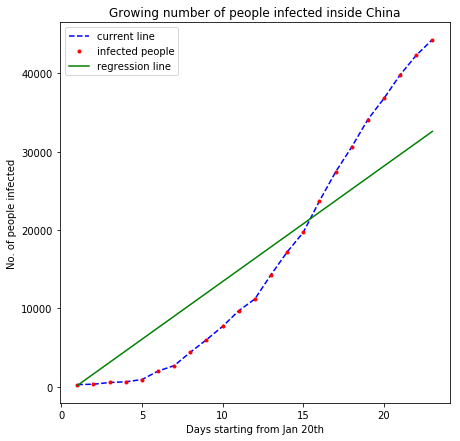

In [5]:
# model over the china data
tit1 = "Growing number of people infected inside China"
np_china = np.array(china)
np_days = np.arange(1, len(china)+1)

# applying the regression formulae
china_slope = get_slope(np_days, np_china)
china_coeff = get_coeff(np_days, np_china, china_slope)

# plotting the results
hand = plot_lines_points(np_days, np_china, tit1)
china_pred, han = plot_reg_line(np_days, np_china, china_slope, china_coeff)

plt.legend(handles=hand.extend(han))
print("The slope of china data: ", china_slope)
print("The coefficeint of china data: ", china_coeff)
print("The predicted values after linear regression: ")
print(china_pred)
plt.show()

The slope of non-china data:  14.9362231534835
The coefficeint of non-china data:  -10.408590885280262
The predicted values after linear regression: 
[  4.52763227  19.46385542  34.40007858  49.33630173  64.27252488
  79.20874804  94.14497119 109.08119434 124.0174175  138.95364065
 153.8898638  168.82608696 183.76231011 198.69853326 213.63475642
 228.57097957 243.50720272 258.44342588 273.37964903 288.31587218
 303.25209534 318.18831849 333.12454164]


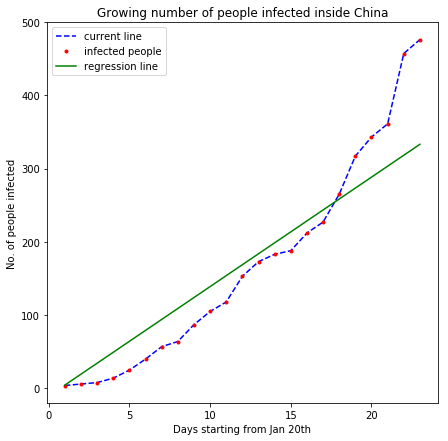

In [6]:
# model over the non-china data
tit2 = "Growing number of people infected outside China"
np_non = np.array(non_china)
np_days = np.arange(1, len(non_china)+1)

# applying the regression formulae
non_slope = get_slope(np_days, np_non)
non_coeff = get_coeff(np_days, np_non, non_slope)

# plotting the results
hand = plot_lines_points(np_days, np_non, tit1)
non_pred, han = plot_reg_line(np_days, np_non, non_slope, non_coeff)

plt.legend(handles=hand.extend(han))
print("The slope of non-china data: ", non_slope)
print("The coefficeint of non-china data: ", non_coeff)
print("The predicted values after linear regression: ")
print(non_pred)
plt.show()

# Making predictions

The predicted values after linear regression and future works: 
[34060.46883185 35534.32674175 37008.18465165 38482.04256155
 39955.90047145 41429.75838135 42903.61629125 44377.47420115
 45851.33211105 47325.19002095]


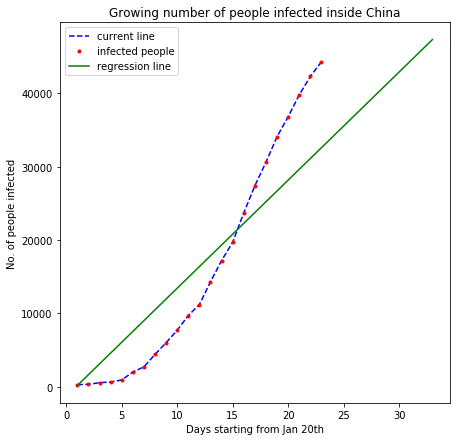

In [7]:
# predictions on the china model
h00 = plot_lines_points(np_days, np_china, tit1)

pred_days0 = np.arange(1, len(np_china) + 1 + 10)
pred0, h01 = plot_reg_line(pred_days0, np_china, china_slope, china_coeff)

plt.legend(handles=h00.extend(h01))
print("The predicted values after linear regression and future works: ")
print(pred0[len(np_china):])
plt.show()

The predicted values after linear regression and future works: 
[348.0607648  362.99698795 377.93321111 392.86943426 407.80565741
 422.74188057 437.67810372 452.61432687 467.55055003 482.48677318]


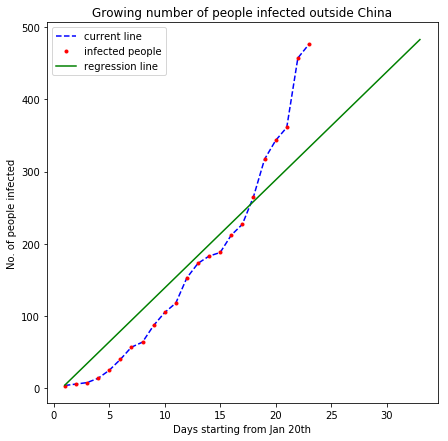

In [8]:
# predictions on the non-china model
h10 = plot_lines_points(np_days, np_non, tit2)

pred_days1 = np.arange(1, len(np_non) + 1 + 10)
pred1, h11 = plot_reg_line(pred_days1, np_non, non_slope, non_coeff)

plt.legend(handles=h10.extend(h11))
print("The predicted values after linear regression and future works: ")
print(pred1[len(np_non):])
plt.show()

# Calculating errors

In [9]:
def get_error():
    e = actual - prediction
    sse = np.sum(e ** 2)
    msse = (1/(2*len(actual)))*sse
    
e0 = (np_china - china_pred)
sse0 = np.sum(e0**2)
msse0 = (1/(2*len(china)))*sse0

print("Error difference: ", e0)
print("Sum of squared errors: ", sse0)
print("Mean sum of squared errors: ", msse0)

Error difference:  [  116.26309586 -1309.59481404 -2562.45272394 -3944.31063384
 -5141.16854374 -5531.02645364 -6304.88436354 -6078.74227344
 -5952.60018334 -5726.45809324 -5200.31600314 -5174.17391304
 -3548.03182294 -2121.88973284 -1095.74764274  1430.39444735
  3656.53653745  5382.67862755  7408.82071765  8634.96280775
 10161.10489785 11187.24698795 11713.38907805]
Sum of squared errors:  837360345.974826
Mean sum of squared errors:  18203485.782061435


In [10]:
e1 = (np_non - non_pred)
sse1 = np.sum(e1**2)
msse1 = (1/(2*len(non_china)))*sse1

print("Error difference: ", e1)
print("Sum of squared errors: ", sse1)
print("Mean sum of squared errors: ", msse1)

Error difference:  [ -0.52763227 -13.46385542 -26.40007858 -35.33630173 -39.27252488
 -39.20874804 -37.14497119 -45.08119434 -37.0174175  -33.95364065
 -35.8898638  -15.82608696 -10.76231011 -15.69853326 -25.63475642
 -16.57097957 -16.50720272   6.55657412  43.62035097  54.68412782
  57.74790466 138.81168151 142.87545836]
Sum of squared errors:  62200.05317393197
Mean sum of squared errors:  1352.175068998521


# B. Linear Regression - Gradient Descent

In [11]:
eta = 0.1
n_iter = 10

theta = np.random.randn(2,1)

def gradient_descent(theta_vals, eta, n_iter, x, y):
    # theta_vals: the two coefficients
    # eta: the learning rate
    # n_iter: number of iterations
    # x: input vector
    # y: output vector
    
    x_b = np.c_[np.ones((x.shape)), x]
    err = []
    
    # train over the number of iterations
    for i in range(n_iter):
        # collects the results of each gradient
        batch = np.zeros(2).reshape(2, 1)
        
        # run over each row via a batch wise method
        for row in range(x_b.shape[0]):
            # get a single row
            val = x_b[row].reshape(1, 2)
            #print(val.shape, theta_vals.shape)
            
            # get the gradient
            grad = 2/x_b.shape[0] * (val.T.dot(val.dot(theta_vals) - y[row]))
            # add it to the collection of results
            batch = batch + grad
            #print(grad)
        
        # update the theta values
        theta_vals = theta_vals - (eta * batch)
        #print("\nBatched results: ", batch)
        #print("\nNew Theta values: ", theta_vals)
        #err.append[theta_vals]
        cur = x*theta_vals[1] + theta_vals[0]
        plt.plot(np.arange(x.shape[0]), cur, 'b-')
        
    return theta_vals

array([[-3628.02627463],
       [ 1788.68944021]])

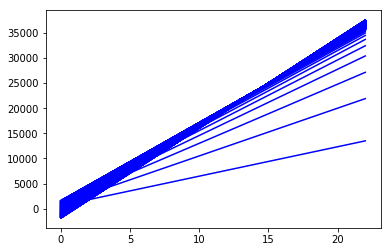

In [12]:
a = gradient_descent(theta, 0.001, 1000, np_days, np_china)
a

In [13]:
china_coeff, china_slope

(-1312.121005762181, 1473.8579099004714)

# C. Linear Regression - Sklearn 

In [14]:
# testing the sklearn framework
from sklearn.linear_model import LinearRegression
sk_lr = LinearRegression()
sk = sk_lr.fit(np.arange(np_china.shape[0]).reshape(-1, 1), np_china)
sk.coef_, sk.intercept_

(array([2189.56027668]), -7710.989130434778)

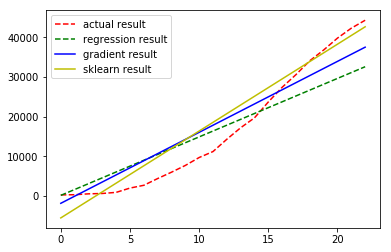

In [15]:
# actual values
l1, = plt.plot(np.arange(np_days.shape[0]), np_china, 'r--', label="actual result")

# linear regression formula values
lr = np_days*china_slope + china_coeff
l2, = plt.plot(np.arange(np_days.shape[0]), lr, 'g--', label="regression result")

# linear regression gradient descent values
gd = np_days*a[1] + a[0]
l3, = plt.plot(np.arange(np_days.shape[0]), gd, 'b-', label="gradient result")

# sklearn linear regression
slr = np_days*sk.coef_ + sk.intercept_
l4, = plt.plot(np.arange(np_days.shape[0]), slr, 'y-', label="sklearn result")

plt.legend(handles=[l1, l2, l3, l4])

In [16]:
pred_sk = np.arange(np_days.shape[0] + 10)*sk.coef_ + sk.intercept_
pred_sk[np_days.shape[0]:]

array([42648.8972332 , 44838.45750988, 47028.01778656, 49217.57806324,
       51407.13833992, 53596.6986166 , 55786.25889328, 57975.81916996,
       60165.37944664, 62354.93972332])

In [17]:
pred_gr = np.arange(np_days.shape[0] + 10)*a[1] + a[0]
pred_gr[np_days.shape[0]:]

array([37511.8308503 , 39300.52029052, 41089.20973073, 42877.89917095,
       44666.58861116, 46455.27805138, 48243.96749159, 50032.6569318 ,
       51821.34637202, 53610.03581223])